In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
from keras.layers import BatchNormalization, Dropout
from keras.utils import to_categorical
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
# -- Preparatory code --
# Model configuration
batch_size = 200
no_epochs = 30
learning_rate = 0.0001
no_classes = 10
validation_split = 0.2
verbosity = 1

In [ ]:
# Convert 1D vector into 3D values, provided by the 3D MNIST authors at
# https://www.kaggle.com/daavoo/3d-mnist
def array_to_color(array, cmap="Oranges"):
  s_m = plt.cm.ScalarMappable(cmap=cmap)
  return s_m.to_rgba(array)[:,:-1]

In [ ]:
# Reshape data into format that can be handled by Conv3D layers.
# Courtesy of Sam Berglin; Zheming Lian; Jiahui Jang - University of Wisconsin-Madison
# Report - https://github.com/sberglin/Projects-and-Papers/blob/master/3D%20CNN/Report.pdf
# Code - https://github.com/sberglin/Projects-and-Papers/blob/master/3D%20CNN/network_final_version.ipynb
def rgb_data_transform(data):
  data_t = []
  for i in range(data.shape[0]):
    data_t.append(array_to_color(data[i]).reshape(16, 16, 16, 3))
  return np.asarray(data_t, dtype=np.float32)

In [ ]:
# -- Process code --
# Load the HDF5 data file
with h5py.File("./full_dataset_vectors.h5", "r") as hf:    

    # Split the data into training/test features/targets
    X_train = hf["X_train"][:]
    targets_train = hf["y_train"][:]
    X_test = hf["X_test"][:] 
    targets_test = hf["y_test"][:]

    # Determine sample shape
    sample_shape = (16, 16, 16, 3)

    # Reshape data into 3D format
    X_train = rgb_data_transform(X_train)
    X_test = rgb_data_transform(X_test)

    # Convert target vectors to categorical targets
    targets_train = to_categorical(targets_train).astype(np.integer)
    targets_test = to_categorical(targets_test).astype(np.integer)

In [ ]:
# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])

In [ ]:
 # Fit data to model
history = model.fit(X_train, targets_train,
                batch_size=batch_size,
                epochs=no_epochs,
                verbose=verbosity,
                validation_split=validation_split)

Epoch 1/30
40/40 [==============================] - 2s 39ms/step - loss: 3.5064 - accuracy: 0.1110 - val_loss: 2.5040 - val_accuracy: 0.0965
Epoch 2/30
40/40 [==============================] - 1s 35ms/step - loss: 2.4243 - accuracy: 0.1935 - val_loss: 2.3605 - val_accuracy: 0.1125
Epoch 3/30
40/40 [==============================] - 1s 35ms/step - loss: 2.1551 - accuracy: 0.2605 - val_loss: 2.2661 - val_accuracy: 0.2170
Epoch 4/30
40/40 [==============================] - 1s 35ms/step - loss: 1.9793 - accuracy: 0.3223 - val_loss: 2.2100 - val_accuracy: 0.2270
Epoch 5/30
40/40 [==============================] - 1s 35ms/step - loss: 1.8534 - accuracy: 0.3681 - val_loss: 2.1324 - val_accuracy: 0.2440
Epoch 6/30
40/40 [==============================] - 1s 35ms/step - loss: 1.7600 - accuracy: 0.4120 - val_loss: 2.0132 - val_accuracy: 0.2955
Epoch 7/30
40/40 [==============================] - 1s 35ms/step - loss: 1.6515 - accuracy: 0.4464 - val_loss: 1.8318 - val_accuracy: 0.3870
Epoch 8/30
40

In [ ]:
# Generate generalization metrics
score = model.evaluate(X_test, targets_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.1546573638916016 / Test accuracy: 0.5920000076293945


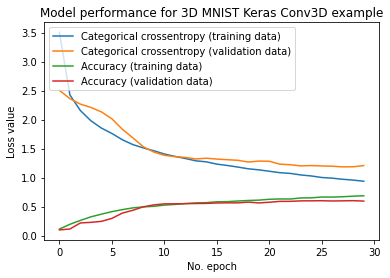

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()